In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator #used for loading and transforming images
from tensorflow import keras
model = keras.models.load_model("../models/brain_tumor_cnn.keras")


/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [8]:
train_dir = "../dataset/Training/"
test_dir = "../dataset/Testing/"

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, #normalize pixel values
    rotation_range = 20, #Rotate images randomly within 20 degrees
    width_shift_range = 0.2, #Shift images horizontally by 20%
    height_shift_range = 0.2, #shift images vertically by 20%
    zoom_range = 0.2, # Random zooming (in and out by 20%)
    horizontal_flip = True, #flip images horizontally
    fill_mode = 'nearest' #fill empty pixels with nearst values

)

In [10]:
#No augmentation for validation and testing set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
#Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), #Resize images to match CNN
    batch_size = 32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), #Resize images to match CNN
    batch_size = 32,
    class_mode='categorical'
)

Found 1311 images belonging to 4 classes.


In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [25]:
#train the model
history = model.fit(
    train_generator,
    epochs = 10, #run 10 iterations
    validation_data = test_generator
)
# Save the trained model
model.save("../models/brain_tumor_cnn.keras")


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 355ms/step - accuracy: 0.8536 - loss: 0.3976 - val_accuracy: 0.8108 - val_loss: 0.5019
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 354ms/step - accuracy: 0.8600 - loss: 0.3942 - val_accuracy: 0.8078 - val_loss: 0.5527
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 356ms/step - accuracy: 0.8637 - loss: 0.3748 - val_accuracy: 0.7879 - val_loss: 0.5968
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 356ms/step - accuracy: 0.8649 - loss: 0.3817 - val_accuracy: 0.8200 - val_loss: 0.5099
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 360ms/step - accuracy: 0.8615 - loss: 0.3668 - val_accuracy: 0.8520 - val_loss: 0.3799
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 358ms/step - accuracy: 0.8640 - loss: 0.3748 - val_accuracy: 0.8009 - val_loss: 0.6806
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 357ms/step - accuracy: 0.8745 - loss: 0.3417 - val_accuracy: 0.8452 - val_loss: 0.4019
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 357ms/step - accuracy: 0.8621 - loss: 0

In [26]:
#evaluate model on test data

test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8215 - loss: 0.5099
Test accuracy: 82.99%
Test Loss: 0.4930


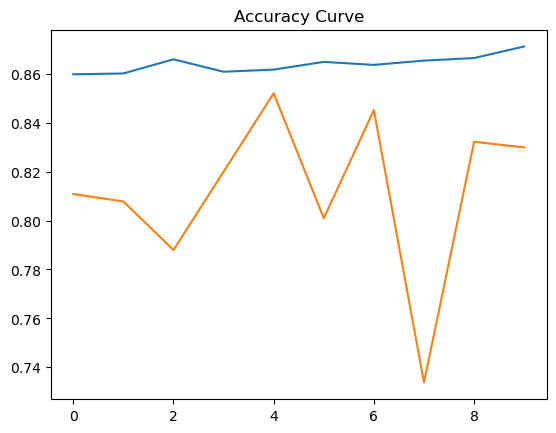

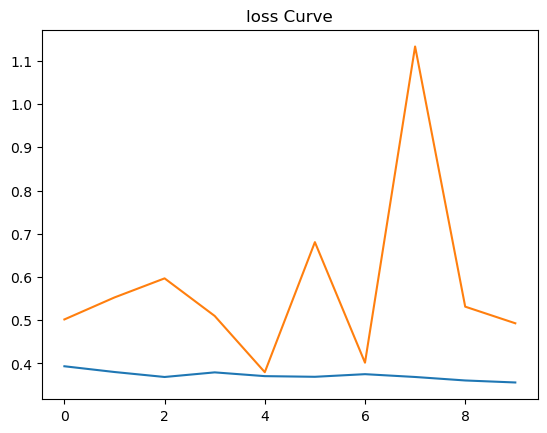

In [27]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend
plt.title("Accuracy Curve")
plt.show()

#plot loss
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend
plt.title("loss Curve")
plt.show()

In [23]:
print(history.history.keys())
print(len(train_generator), len(test_generator))


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
179 41
